# Part 1: Data preprocessing

dataset source:https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

1. Importing the libraries
2. Importing the dataset
3. Dealing with missing data
4. Encoding categorical variables
5. Splitting the dataset into train and test set
6. Feature scaling

## Importing the libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/data.csv')

## Data exploration

In [ ]:
dataset.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [ ]:
dataset.shape

(569, 33)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
dataset = dataset.drop(columns='Unnamed: 32')

In [ ]:
dataset.head()

id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678

[5 rows x 32 columns]

In [ ]:
# Statistical summary
dataset.describe()

id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count  5.690000e+02   569.000000  ...      569.000000               569.000000
mean   3.037183e+07    14.127292  ...        0.290076                 0.083946
std    1.250206e+08     3.524049  ...        0.061867                 0.018061
min    8.670000e+03     6.981000  ...        0.156500                 0.055040
25%    8.692180e+05    11.700000  ...        0.250400                 0.071460
50%    9.060240e+05    13.370000  ...        0.282200                 0.080040
75%    8.813129e+06    15.780000  ...        0.317900                 0.092080
max    9.113205e+08    28.110000  ...        0.663800                 0.207500

[8 rows x 31 columns]

In [ ]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Dealing with the missing data

In [ ]:
# check if there are any null values
dataset.isnull().values.any()

False

In [ ]:
# check how many null values
dataset.isnull().values.sum()

0

## Encoding the categorical data

In [ ]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [ ]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
dataset['diagnosis'].nunique()

2

In [ ]:
dataset.head()

id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678

[5 rows x 32 columns]

In [ ]:
dataset.shape

(569, 32)

In [ ]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [ ]:
dataset.head()

id  radius_mean  ...  fractal_dimension_worst  diagnosis_M
0    842302        17.99  ...                  0.11890            1
1    842517        20.57  ...                  0.08902            1
2  84300903        19.69  ...                  0.08758            1
3  84348301        11.42  ...                  0.17300            1
4  84358402        20.29  ...                  0.07678            1

[5 rows x 32 columns]

In [ ]:
dataset.shape

(569, 32)

## Countplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


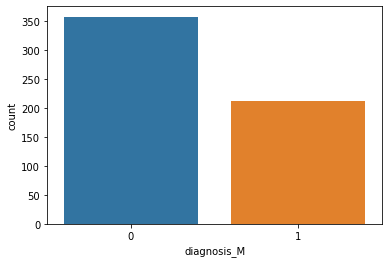

In [ ]:
sns.countplot(dataset['diagnosis_M'], label='Count')
plt.show()

In [ ]:
# benign (B) values
(dataset.diagnosis_M == 0).sum()

357

In [ ]:
# malignant (M) values
(dataset.diagnosis_M == 1).sum()

212

## Correlation matrix and Heatmap

In [ ]:
dataset_2 = dataset.drop(columns='diagnosis_M')

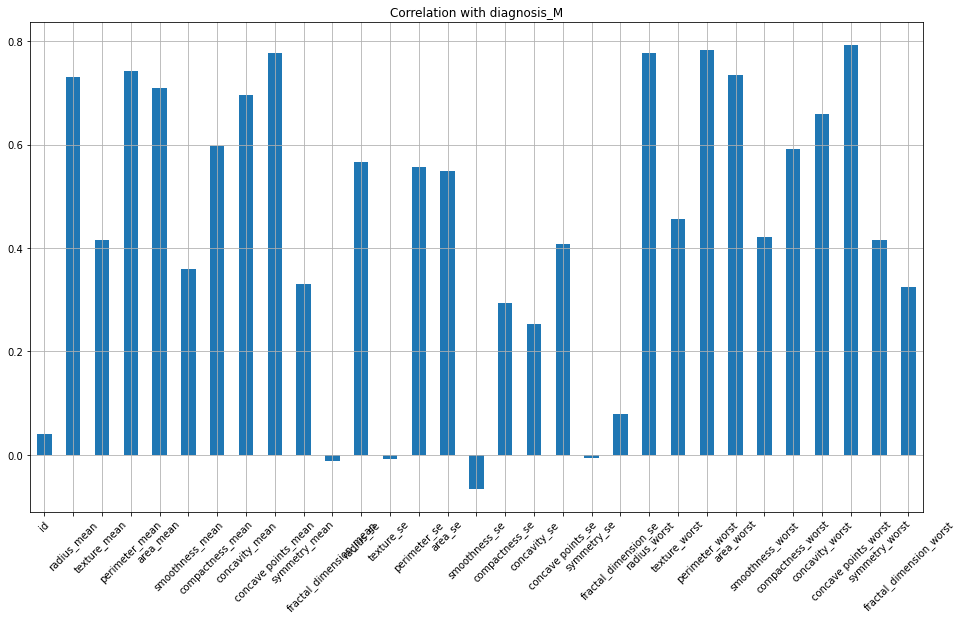

In [ ]:
dataset_2.corrwith(dataset['diagnosis_M']).plot.bar(
    figsize=(16,9), title = 'Correlation with diagnosis_M',
    rot = 45, grid = True
)

In [ ]:
# Create Correlation Matrix
corr = dataset.corr()

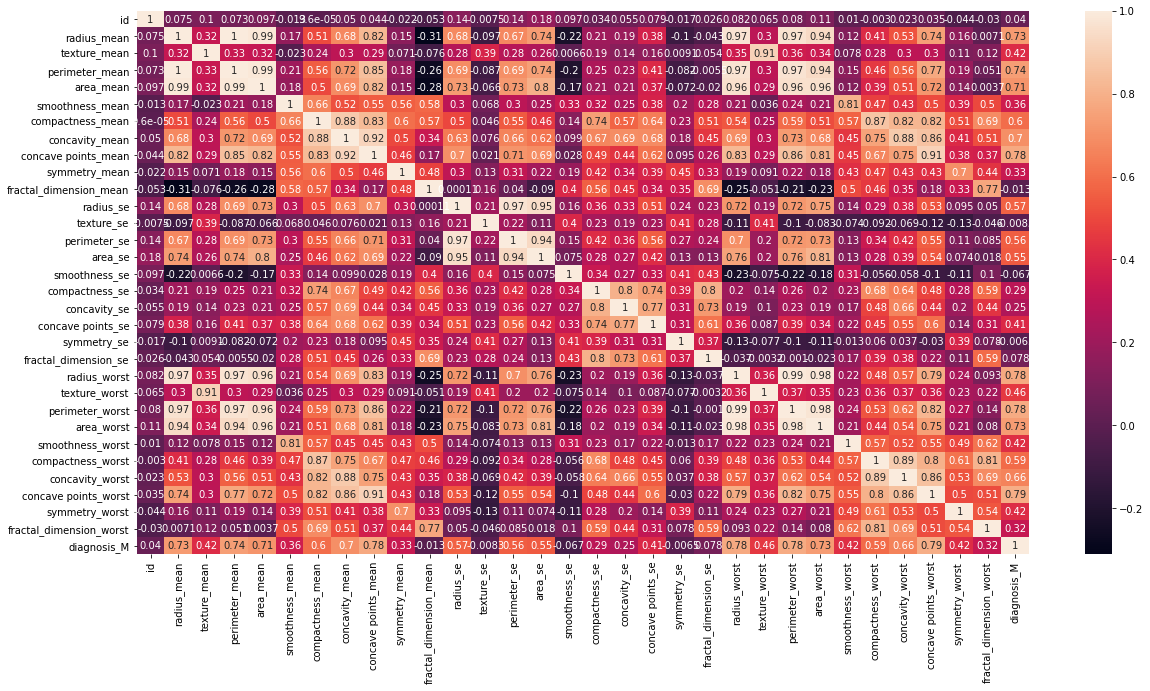

In [ ]:
# Check the correlation between variables

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

## Splitting the dataset into train and test set

In [ ]:
dataset.head()

id  radius_mean  ...  fractal_dimension_worst  diagnosis_M
0    842302        17.99  ...                  0.11890            1
1    842517        20.57  ...                  0.08902            1
2  84300903        19.69  ...                  0.08758            1
3  84348301        11.42  ...                  0.17300            1
4  84358402        20.29  ...                  0.07678            1

[5 rows x 32 columns]

In [ ]:
# matrix of features / independent variables
x = dataset.iloc[:, 1:-1].values

In [ ]:
x.shape

(569, 30)

In [ ]:
# dependent variable
y = dataset.iloc[:, -1].values

In [ ]:
y.shape

(569,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_train.shape

(455, 30)

In [ ]:
x_test.shape

(114, 30)

In [ ]:
y_train.shape

(455,)

In [ ]:
y_test.shape

(114,)

## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [ ]:
x_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

# Part 2: Building the model

## 1) Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier_lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)


results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  2]
 [ 2 45]]


In [ ]:
results

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.964912   0.957447  0.957447  0.957447

### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 97.81 %
Standard Deviation is 1.98 %


## 2) Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier_rf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.964912   0.957447  0.957447  0.957447
1        Random Forest  0.964912   0.938776  0.978723  0.958333

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  3]
 [ 1 46]]


### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 96.05 %
Standard Deviation is 3.07 %


## 3) XGBoost

In [ ]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = classifier_xgb.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.964912   0.957447  0.957447  0.957447
1        Random Forest  0.964912   0.938776  0.978723  0.958333
2              XGBoost  0.973684   0.978261  0.957447  0.967742

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  1]
 [ 2 45]]


### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 95.60 %
Standard Deviation is 2.97 %


# Part 3: Randomized Search to find the best parameters (Logistic regression)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = [
              {'penalty':['l1', 'l2', 'elasticnet', 'none'],
               'C':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
               'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
               }
              ]

In [ ]:
parameters

[{'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
  'penalty': ['l1', 'l2', 'elasticnet', 'none'],
  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

In [ ]:
randomized_search = RandomizedSearchCV(estimator = classifier_lr, param_distributions = parameters,
                                 n_iter = 5, scoring='roc_auc', n_jobs = -1, cv = 5, verbose=3)

# cv: cross-validation
# n_jobs = -1:
# Number of jobs to run in parallel. -1 means using all processors

In [ ]:
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=0,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions=[{'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5,
                                               1.75, 2],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
           

In [ ]:
randomized_search.best_estimator_

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
randomized_search.best_params_

{'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
randomized_search.best_score_

0.9954022988505746

# Part 4: Final Model (Logistic regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
classifier.fit(x_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Final Logistic regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Precision    Recall  F1 Score
0        Logistic Regression  0.964912   0.957447  0.957447  0.957447
1              Random Forest  0.964912   0.938776  0.978723  0.958333
2                    XGBoost  0.973684   0.978261  0.957447  0.967742
3  Final Logistic regression  0.964912   0.957447  0.957447  0.957447

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 98.24 %
Standard Deviation is 2.16 %
